In [1]:
!pip install numpy pandas matplotlib seaborn wheel pandas_profiling jupyter notebook -i https://pypi.tuna.tsinghua.edu.cn/simple

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple


In [2]:
!pip install graphviz pydotplus 

Looking in indexes: https://mirrors.aliyun.com/pypi/simple/


In [3]:
!pip install scikit-learn -i https://pypi.tuna.tsinghua.edu.cn/simple

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple


In [4]:
!pip install pdpbox eli5 -i https://pypi.tuna.tsinghua.edu.cn/simple

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple


In [5]:
!pip install shap -i https://pypi.tuna.tsinghua.edu.cn/simple

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple


In [6]:
import pandas as pd

In [7]:
df = pd.read_csv("dataset2.csv")

In [8]:
df.shape

(49999, 13)

In [9]:
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [10]:
df.corr()

,Hospital_code,Hospital_type_code,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Bed Grade,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
Hospital_code,1.000000,0.013329,-0.140763,-0.053023,0.000950,0.136781,-0.020134,-0.014879,0.013209,-0.031363,0.008677,0.052215,0.039903
Hospital_type_code,0.013329,1.000000,0.234725,-0.087142,0.036561,-0.062279,0.012534,0.063926,0.013989,-0.044368,0.001467,0.017993,0.059653
Hospital_region_code,-0.140763,0.234725,1.000000,0.009066,0.041405,-0.136901,-0.038900,-0.043342,0.022359,-0.001902,-0.023810,0.072854,0.027808
Available Extra Rooms in Hospital,-0.053023,-0.087142,0.009066,1.000000,0.104886,-0.217871,-0.126865,-0.029710,0.012086,0.095039,-0.149672,-0.156702,-0.119464
Department,0.000950,0.036561,0.041405,0.104886,1.000000,-0.012108,-0.079011,-0.032250,-0.019161,0.009912,-0.076645,-0.090460,0.018589
Ward_Type,0.136781,-0.062279,-0.136901,-0.217871,-0.012108,1.000000,0.014939,0.075804,-0.025910,-0.113502,0.000494,0.060061,0.032883
Bed Grade,-0.020134,0.012534,-0.038900,-0.126865,-0.079011,0.014939,1.000000,0.114380,-0.258376,0.076783,0.054933,0.090839,0.026279
Type of Admission,-0.014879,0.063926,-0.043342,-0.029710,-0.032250,0.075804,0.114380,1.000000,0.009733,-0.076001,-0.020712,0.082140,0.072283
Severity of Illness,0.013209,0.013989,0.022359,0.012086,-0.019161,-0.025910,-0.258376,0.009733,1.000000,0.060634,0.013021,-0.082436,0.105599
Visitors with Patient,-0.031363,-0.044368,-0.001902,0.095039,0.009912,-0.113502,0.076783,-0.076001,0.060634,1.000000,0.053370,-0.165646,0.554307


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49999 entries, 0 to 49998
Data columns (total 13 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Hospital_code                      49999 non-null  float64
 1   Hospital_type_code                 49999 non-null  float64
 2   Hospital_region_code               49999 non-null  float64
 3   Available Extra Rooms in Hospital  49999 non-null  float64
 4   Department                         49999 non-null  float64
 5   Ward_Type                          49999 non-null  float64
 6   Bed Grade                          49999 non-null  float64
 7   Type of Admission                  49999 non-null  float64
 8   Severity of Illness                49999 non-null  float64
 9   Visitors with Patient              49999 non-null  float64
 10  Age                                49999 non-null  float64
 11  Admission_Deposit                  49999 non-null  flo

In [12]:
df.shape

(49999, 13)

In [13]:
#切分训练集和测试集#
def randSplit(dataSet, rate=0.9):
    n = dataSet.shape[0]
    m = int(n*rate)
    train = dataSet.iloc[:m,:]
    test = dataSet.iloc[m:,:]
    test .index = range(test.shape[0]) 
    return train,test

In [14]:
train, test = randSplit(df)

In [15]:
train.shape

(44999, 13)

In [16]:
train

,Hospital_code,Hospital_type_code,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Bed Grade,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,0.225806,0.250,1.0,0.125000,0.00,1.0,0.333333,0.0,1.000000,0.06250,0.476190,0.307411,0.000000
1,0.032258,0.250,1.0,0.083333,0.00,0.6,0.333333,1.0,1.000000,0.06250,0.476190,0.410474,0.380952
2,0.290323,0.500,0.0,0.083333,0.25,0.6,0.333333,1.0,1.000000,0.06250,0.476190,0.291008,0.285714
3,0.806452,0.125,0.5,0.083333,0.00,1.0,0.333333,1.0,1.000000,0.06250,0.476190,0.540711,0.380952
4,0.806452,0.125,0.5,0.083333,0.00,0.6,0.333333,1.0,1.000000,0.06250,0.476190,0.371344,0.380952
...,...,...,...,...,...,...,...,...,...,...,...,...,...
44994,0.258065,0.375,1.0,0.125000,0.75,1.0,0.333333,1.0,0.333333,0.06250,0.285714,0.193775,0.190476
44995,0.580645,0.000,0.5,0.125000,0.75,0.6,0.000000,0.0,0.333333,0.18750,0.285714,0.155040,0.666667
44996,0.838710,0.000,0.5,0.125000,0.75,1.0,0.333333,1.0,0.333333,0.06250,0.285714,0.237549,0.190476
44997,1.000000,0.625,0.5,0.083333,0.75,0.6,0.666667,1.0,0.333333,0.09375,0.476190,0.423617,0.285714


In [17]:
test.shape

(5000, 13)

In [18]:
test

,Hospital_code,Hospital_type_code,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Bed Grade,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,0.161290,0.000,0.0,0.125000,0.75,0.4,0.333333,1.0,0.333333,0.12500,0.47619,0.316601,0.285714
1,0.806452,0.125,0.5,0.125000,0.75,1.0,0.333333,0.0,0.333333,0.09375,0.47619,0.534190,0.285714
2,0.225806,0.250,1.0,0.083333,0.25,1.0,0.666667,1.0,0.333333,0.06250,0.47619,0.312945,0.380952
3,0.838710,0.000,0.5,0.166667,0.75,1.0,0.333333,0.0,0.333333,0.09375,0.47619,0.354447,0.285714
4,0.967742,0.250,1.0,0.083333,0.75,1.0,0.333333,1.0,0.333333,0.06250,0.47619,0.462451,0.190476
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.806452,0.125,0.5,0.125000,0.75,0.4,0.666667,1.0,0.333333,0.18750,0.47619,0.388241,0.285714
4996,0.806452,0.125,0.5,0.125000,0.75,0.4,0.666667,1.0,0.333333,0.18750,0.47619,0.383103,0.285714
4997,0.806452,0.125,0.5,0.083333,0.75,0.4,0.666667,0.5,0.333333,0.12500,0.47619,0.223320,0.095238
4998,0.774194,0.500,0.0,0.166667,0.75,0.4,1.000000,0.5,0.333333,0.12500,0.47619,0.385771,0.285714


# class features are chosen according to correlation2

In [21]:
import numpy as np
def stayClass(train, test, k):
    train=pd.DataFrame(train,dtype=np.float)
    test=pd.DataFrame(test,dtype=np.float)
    n = train. shape[1]-1   #训练集的特征个数
    m = test. shape[0]     #测试集的样本数
    result = []                 #放置预测结果
    for i in range(m):
        dist = list((((train.iloc[:, :n] - test.iloc[i, :n]) **2).sum(1))**.5)    #距离计算
        dist_1 = pd.DataFrame({'dist':dist, 'labels':(train.iloc[:, n])})   #追加标签
        dr = dist_1.sort_values(by = 'dist')[: k]   #距离排序
        re = dr.loc[:, 'labels'].value_counts()     #统计
        result.append(re.index[0])    
    result = pd.Series(result)
    res = test.copy()
    res.loc[:, 'predict'] = result  #追加一列预测结果
    acc = (res.iloc[:,-1]==res.iloc[:,-2]).mean()    #计算预测的准确率
    print('accuracy{}'.format(acc))
    return acc, res

In [40]:
acc, df_stay = stayClass(train, test, 21)
df_stay.head()

accuracy0.3046


,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Bed Grade,patientid,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay,predict
0,0.5,0.166667,0.75,0.5,0.666667,0.036886,1.0,0.333333,0.06250,0.47619,0.425395,15.0,15.0
1,0.0,0.125000,0.75,1.0,0.333333,0.036886,1.0,0.333333,0.12500,0.47619,0.316601,35.0,25.0
2,0.5,0.125000,0.75,0.5,0.333333,0.036886,0.0,0.333333,0.09375,0.47619,0.534190,35.0,25.0
3,1.0,0.083333,0.25,0.5,0.666667,0.036886,1.0,0.333333,0.06250,0.47619,0.312945,45.0,15.0
4,0.5,0.166667,0.75,0.5,0.333333,0.036886,0.0,0.333333,0.09375,0.47619,0.354447,35.0,15.0


accuracy0.2568
accuracy0.271
accuracy0.281
accuracy0.2714
accuracy0.2738
accuracy0.2798
accuracy0.2872
accuracy0.2862
accuracy0.2804
accuracy0.2914
accuracy0.2894
accuracy0.2932
accuracy0.2962
accuracy0.297
accuracy0.3002
accuracy0.303
accuracy0.3076
accuracy0.3072
accuracy0.31
accuracy0.3078
accuracy0.3034
accuracy0.3016
accuracy0.3056
accuracy0.3028
accuracy0.3038
accuracy0.303
accuracy0.3058
accuracy0.3048
accuracy0.3036
19
0.31


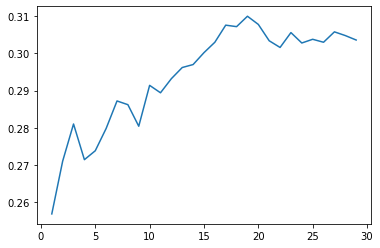

In [22]:
#绘制学习曲线
score = []
krange = range(1,30)

for i in krange:
    acc,re = stayClass(train,test,i)
    score.append(acc)
plt.plot(krange,score);
bestK = krange[score.index(max(score))]
print(bestK)
print(max(score))